# Exploratory Data Analysis

# 데이터셋 출처
* https://www.kaggle.com/uciml/pima-indians-diabetes-database

## 데이터 구성
* Pregnancies : 임신횟수
* Glucose : 2시간 동안의경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린(mu U / ml)
* BMI : 체질량 지수(체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# 라이브러리 로드

In [1]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한  seaborn, matplotlib.pyplot 을 로드한다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 데이터 로드

In [2]:
df = pd.read_csv("data/diabetes.csv")
df.shape

(768, 9)

In [3]:
# 5개만 미리보기

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# 데이터타입, 결측치, 메모리 사용량 등의 정보 보기

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# 결측치 확인

df_null = df.isnull().sum()
df_null

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# 수치데이터에 대한 요약 보기

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# 가장 마지막에 있는 outcome 은 label 값이기 때문에 제외하고
# 학습과 예측에 사용할 컬럼을 만들어 준다.
# feature_columns 라는 변수에 담아준다.

feature_columns = df.columns[:-1].tolist().copy()
feature_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

# 결측치 시각화
값을 요약해 보면 최솟값이 0으로 나오는 값들이 있다. 0이 나올 수 있는 값도 있지만 인슐린이나 혈압 등의 값은 0값이 결측치라고 볼 수 있을 것이다. 따라서 0인 값을 결측치로 처리하고 시각화 해보자.

In [8]:
cols = feature_columns[1:]
cols

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [9]:
# 결측치 여부를 나타내는 데이터프레임을 만든다.
# 0값을 결측치라 가정하고 정답(label, target) 값을 제외한 컬럼에 대해
# 결측치 여부를 구해서 df_null 이라는 데이터프레임에 담는다.

df_null = df[cols].replace(0, np.nan)
df_null = df_null.isnull()
df_null.sum()

Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

<AxesSubplot:>

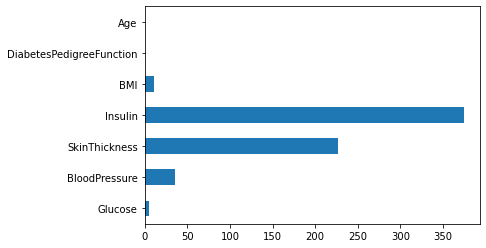

In [10]:
# 결측치의 갯수를 구해 막대 그래프로 시각화한다.

df_null.sum().plot.barh()

<AxesSubplot:>

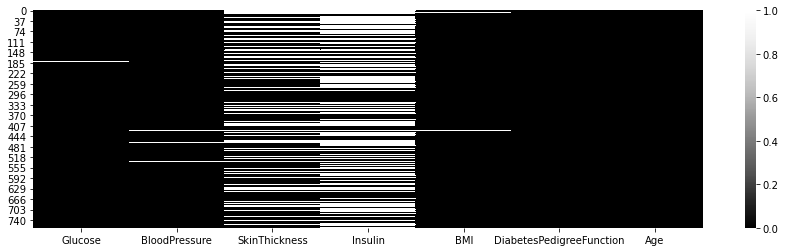

In [11]:
# 결측치를 heatmap 으로 시각화한다.
# true 값은 검정색, false(결측치) 값은 밝은색으로 표시됨

plt.figure(figsize=(15,4))
sns.heatmap(df_null, cmap="Greys_r")

# 정답값
* target, label 이라고 부르기도 한다.

In [12]:
# 정답값인 Outcome 의 갯수 확인 (0 : 당뇨병 발병하지 않음, 1 : 당뇨병 발병함)

df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [13]:
# 정답값인 Outcome 의 비율 확인

df["Outcome"].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [14]:
# 다른 변수와 함께 확인
# 임신횟수와 정답값 비교
# "Pregnancies"를 groupby 로 그룹화해서 Outcome 에 대한 비율 구하기
# 결과를 df_po 라는 변수에 저장

df_po = df.groupby(["Pregnancies"])["Outcome"].agg(["mean", "count"]).reset_index().copy()
df_po

,Pregnancies,mean,count
0,0,0.342342,111
1,1,0.214815,135
2,2,0.184466,103
3,3,0.360000,75
4,4,0.338235,68
5,5,0.368421,57
6,6,0.320000,50
7,7,0.555556,45
8,8,0.578947,38
9,9,0.642857,28


<AxesSubplot:>

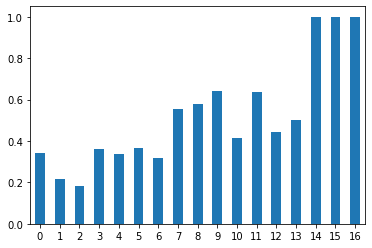

In [15]:
# 임신횟수에 따른 당뇨병 발병 비율

df_po["mean"].plot.bar(rot=0)

# countplot

<AxesSubplot:xlabel='Outcome', ylabel='count'>

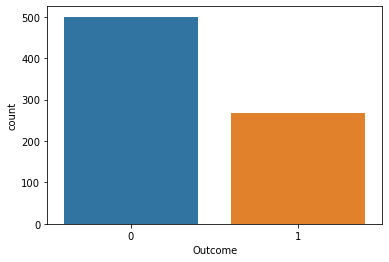

In [16]:
# 위에서 구했던 당뇨병 발병 비율 구하기
# 당뇨병 발병 빈도수를 비교

sns.countplot(data=df, x="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

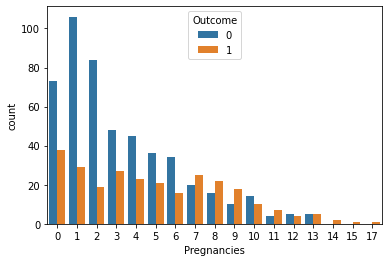

In [17]:
# 임신횟수에 따른 당뇨병 발병 빈도수 비교

sns.countplot(data=df, x="Pregnancies", hue="Outcome")

In [18]:
# 임신횟수의 많고 적음에 따라 Pregnancies_high 변수 생성

df["Pregnancies_high"] = df["Pregnancies"] > 6
df[["Pregnancies", "Pregnancies_high"]].head()

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False


<AxesSubplot:xlabel='Pregnancies_high', ylabel='count'>

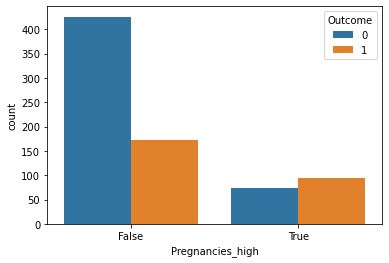

In [19]:
# Pregnancies_high 변수의 빈도수를 countplot 으로 그리고
# Outcome 값에 따라 다른 색상으로 표현

sns.countplot(data=df, x="Pregnancies_high", hue="Outcome")

# barplot
* 기본 설정으로 시각화하면 y축에는 평균을 추정해서 그리게 된다.

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

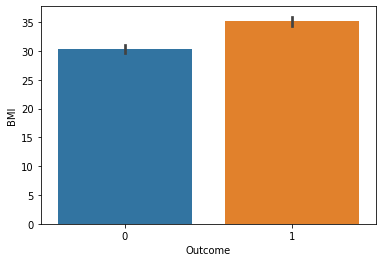

In [20]:
# 당뇨병 발병에 따른 BMI 수치를 비교

sns.barplot(data=df, x="Outcome", y="BMI")

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

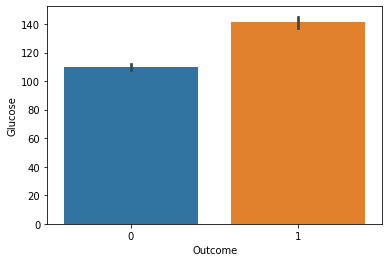

In [21]:
# 당뇨병 발병에 따른 포도당(Glucose) 수치 비교

sns.barplot(data=df, x="Outcome", y="Glucose")

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

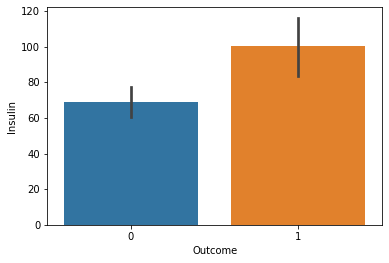

In [22]:
# Insulin 수치가 0 이상인 관측치에 대해서 당뇨병 발병 비교

sns.barplot(data=df, x="Outcome", y="Insulin")

<AxesSubplot:xlabel='Pregnancies', ylabel='Outcome'>

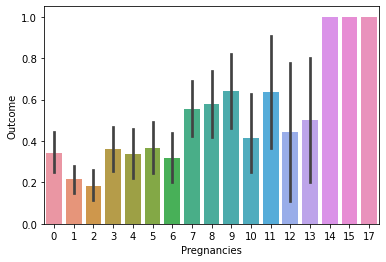

In [23]:
# 임신횟수에 대해서 당뇨병 발병 비율 비교

sns.barplot(data=df, x="Pregnancies", y="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='Glucose'>

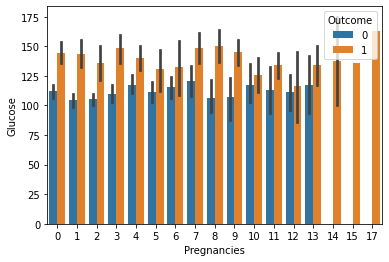

In [24]:
# 임신횟수(Pregnancies)에 따른 포도당(Glucose) 수치를 당뇨병 발병여부(Outcome)에 따라 시각화하기

sns.barplot(data=df, x="Pregnancies", y="Glucose", hue="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='BMI'>

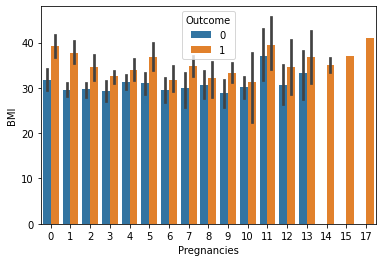

In [25]:
# 임신횟수(Pregnancies)에 따른 체질량지수(BMI)를 당뇨병 발병여부(Outcome)에 따라 시각화하기

sns.barplot(data=df, x="Pregnancies", y="BMI", hue="Outcome")

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

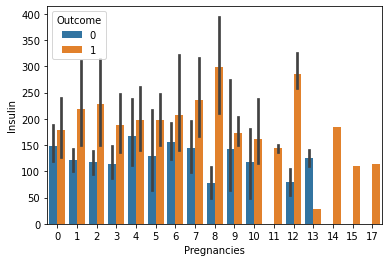

In [26]:
# 임신횟수(Pregnancies)에 따른 인슐린 수치(Insulin)를 당뇨병 발병여부(Outcome)에 따라 시각화하기

sns.barplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")

# boxplot

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

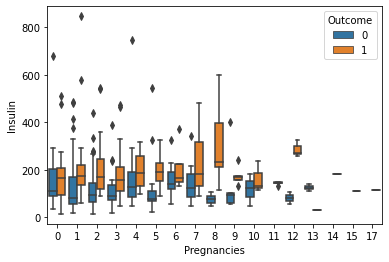

In [27]:
# 임신횟수(Pregnancies)에 따른 인슐린 수치(Insulin)를 당뇨병 발병여부(Outcome)에 따라 시각화하기
# 인슐린 수치에는 결측치가 많기 때문에 0보다 큰 값에 대해서만 그리기

sns.boxplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")

# violinplot

<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

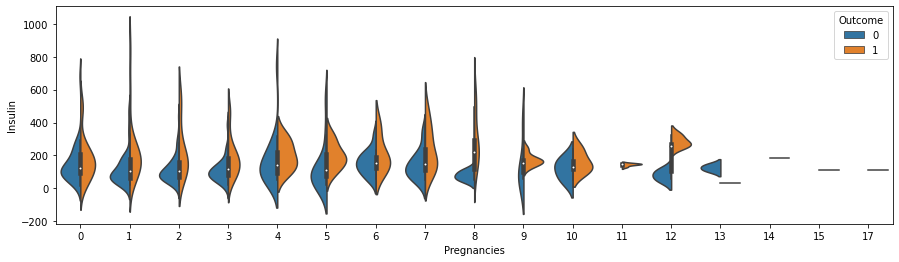

In [28]:
plt.figure(figsize=(15,4))
sns.violinplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome", split=True)

# swarmplot

C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 27.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 18.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Insulin'>

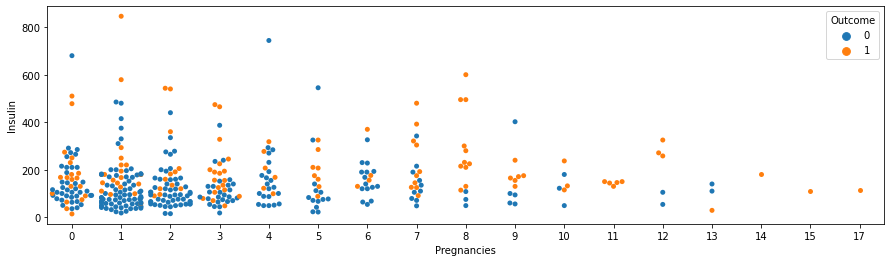

In [29]:
plt.figure(figsize=(15,4))
sns.swarmplot(data=df[df["Insulin"] > 0], x="Pregnancies", y="Insulin", hue="Outcome")

# distplot

In [33]:
df_0 = df[df["Outcome"] == 0]
df_1 = df[df["Outcome"] == 1]
df_0.shape, df_1.shape

((500, 10), (268, 10))

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

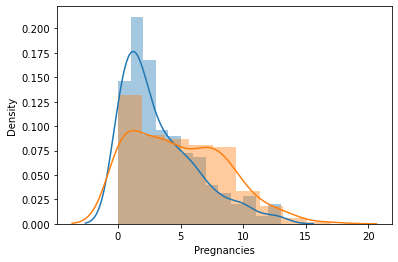

In [35]:
# 임신횟수에 따른 당뇨병 발볍 여부를 시각화한다.

sns.distplot(df_0["Pregnancies"])
sns.distplot(df_1["Pregnancies"])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages

<AxesSubplot:xlabel='Age', ylabel='Density'>

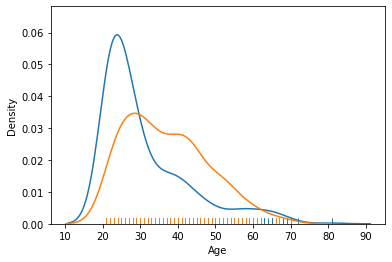

In [42]:
# 나이에 따른 당뇨병 발병 여부를 시각화한다.

sns.distplot(df_0["Age"], hist=False, rug=True)
sns.distplot(df_1["Age"], hist=False, rug=True)

# Subplots

## Pandas 를 통한  histplot 그리기
* pandas 를 사용하면 모든 변수에 대한 서브플롯을 한 번에 그려준다.

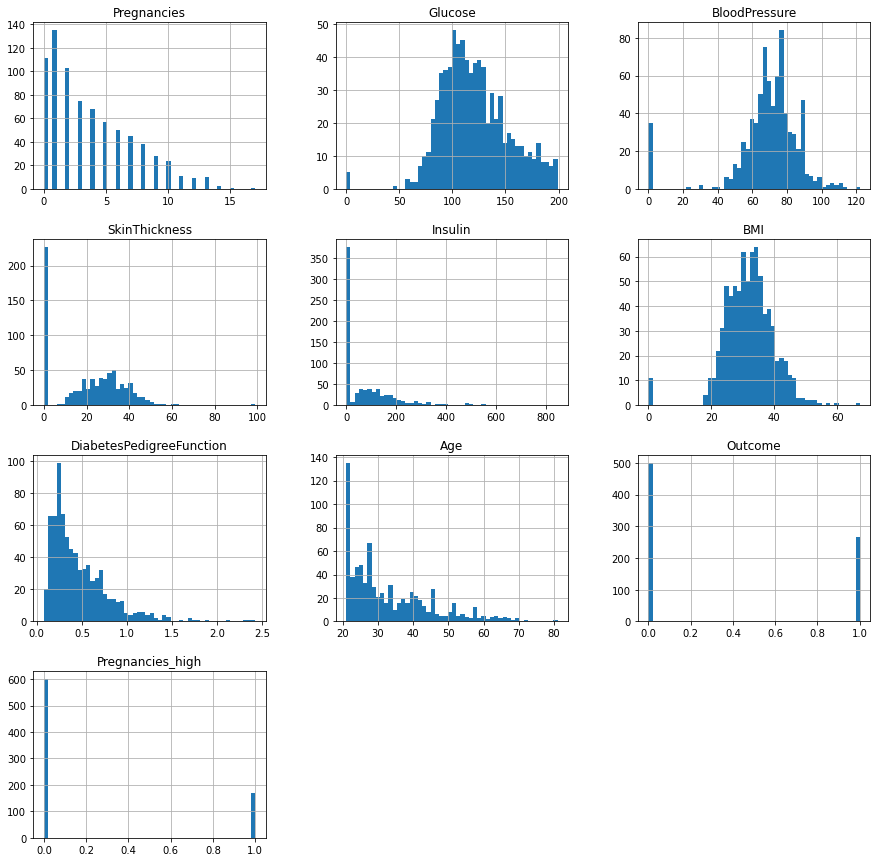

In [48]:
df["Pregnancies_high"] = df["Pregnancies_high"].astype(int)
h = df.hist(figsize=(15, 15), bins=50)

## 반복문을 통한 서브플롯 그리기

### distplot

In [58]:
# 컬럼의 수 만큼 for 문을 만들어서 서브플롯으로 시각화한다.

cols = df.columns[:-1].tolist()
cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

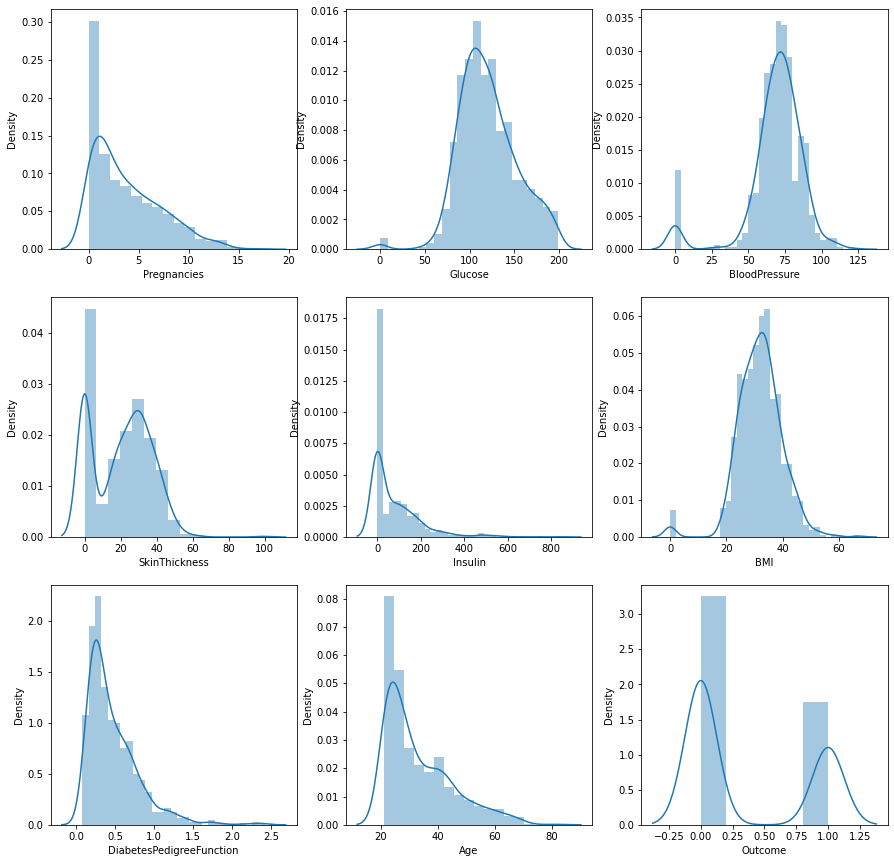

In [63]:
# distplot 으로 서브플롯을 그린다.

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, col_name in enumerate(cols):
    row = i // 3
    col = i % 3
    sns.distplot(df[col_name], ax=axes[row][col])

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

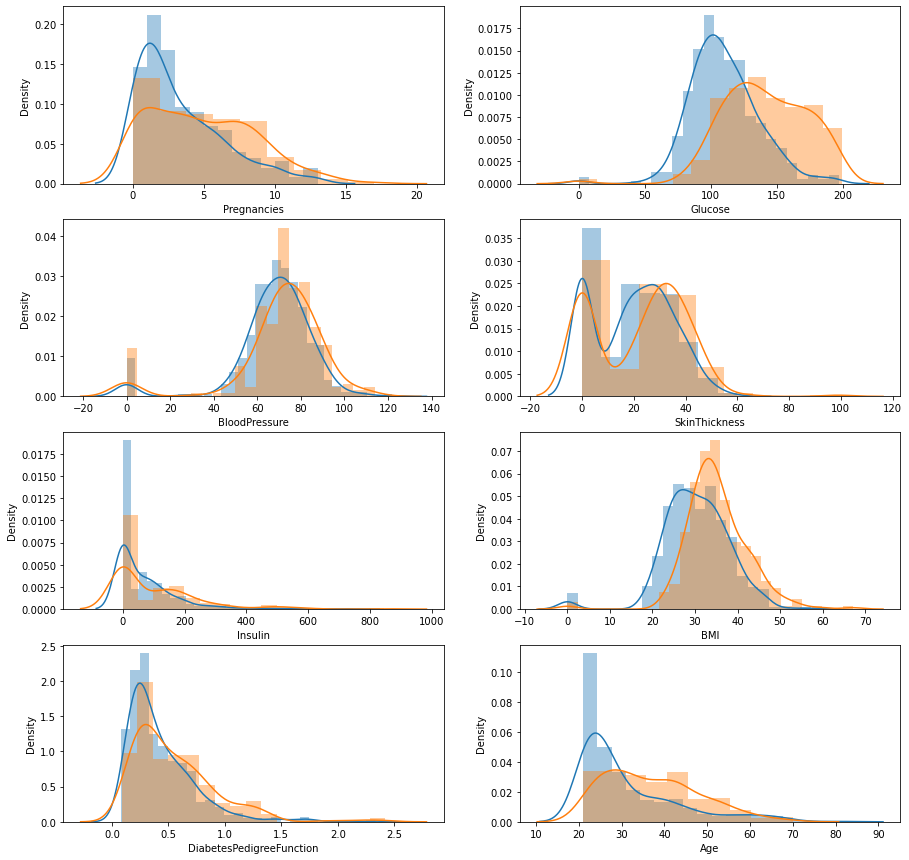

In [68]:
# 모든 변수에 대한 distplot을 그려본다.

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.distplot(df_0[col_name], ax=axes[row][col])
    sns.distplot(df_1[col_name], ax=axes[row][col])

### violinplot

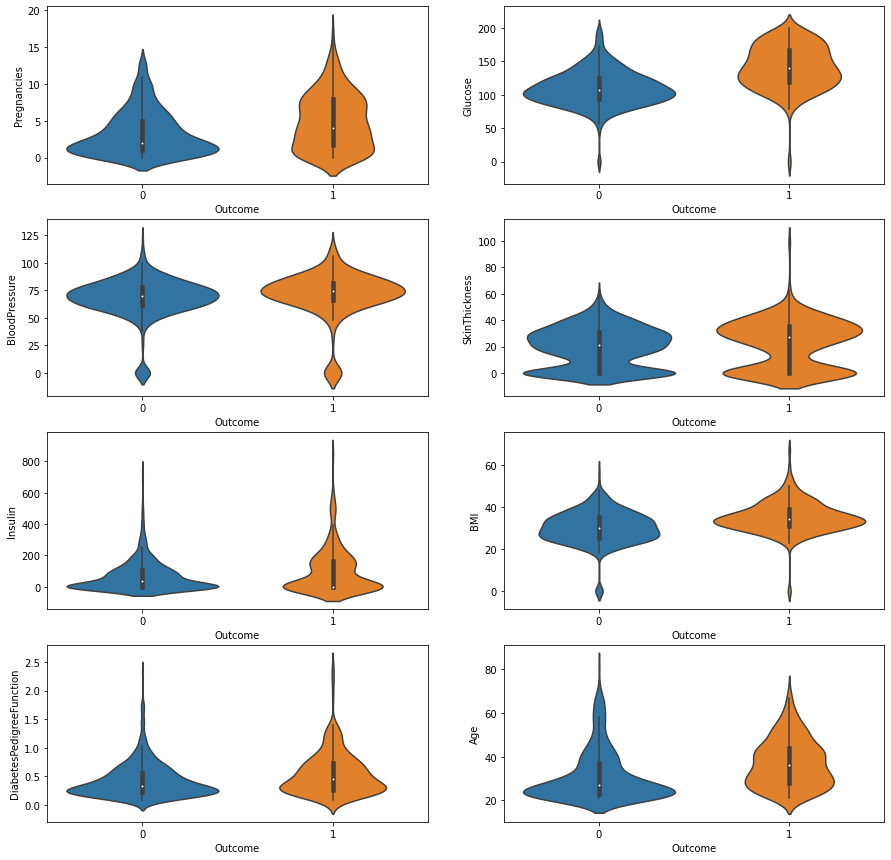

In [75]:
# violinplot 으로 서브플롯 그리기

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

for i, col_name in enumerate(cols[:-1]):
    row = i // 2
    col = i % 2
    sns.violinplot(data=df, x="Outcome", y=col_name, ax=axes[row][col])

### lmplot
* 상관계수가 높은 두 변수에 대해 시각화하기

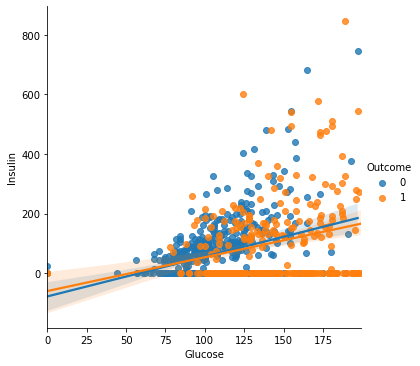

In [78]:
# Glucose 와 Insulin 을 Outcome 으로 구분해 보기

sns.lmplot(data=df, x="Glucose", y="Insulin", hue="Outcome")

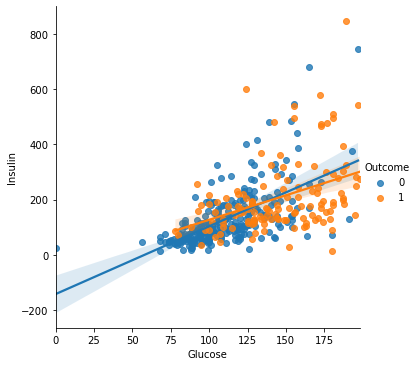

In [79]:
# Insulin 수치가 0 이상인 데이터로만 그리기

sns.lmplot(data=df[df["Insulin"] > 0], x="Glucose", y="Insulin", hue="Outcome")

### pairplot

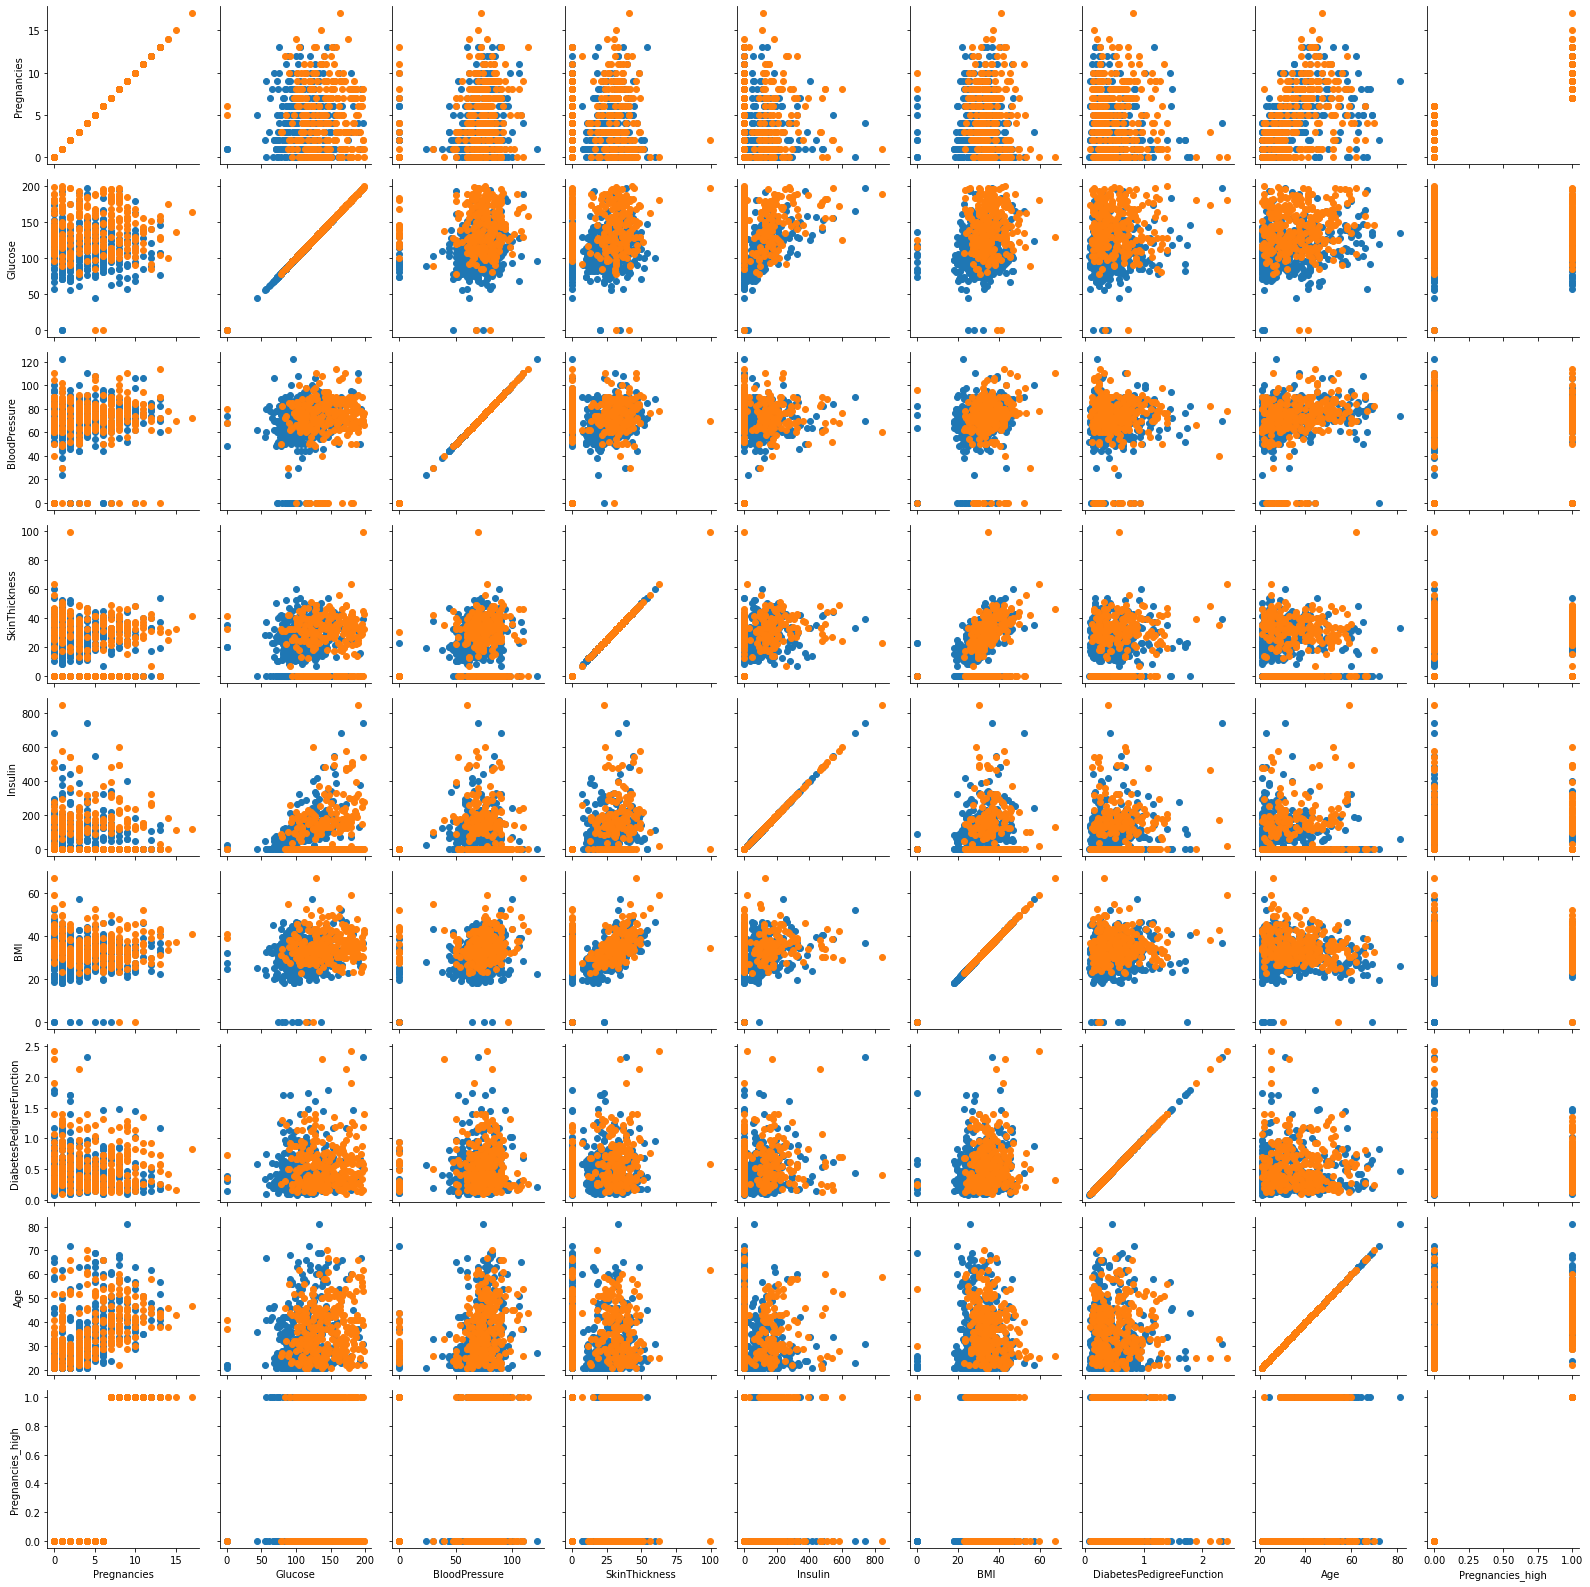

In [81]:
# PairGrid 를 통해 모든 변수에 대해 Outcome 에 따른 scatterplot 을 그리기

g = sns.PairGrid(df, hue="Outcome")
g.map(plt.scatter)

# 상관 분석

In [96]:
df_matrix = df.iloc[:, :-2].replace(0, np.nan)
df_matrix["Outcome"] = df["Outcome"]
df_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2.0,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1.0,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [97]:
# 정답값인 Outcome 을 제외하고 feature 로 사용할 컬럼들에 대해 0을 결측치로 만들어 주어 상관계수 구하기

df_corr = df_matrix.corr()
df_corr.style.background_gradient()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.166329,0.285013,0.167298,0.104081,0.128207,-0.006459,0.550525,0.268218
Glucose,0.166329,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.285013,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.167298,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.104081,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.128207,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.006459,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.550525,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.268218,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


<AxesSubplot:>

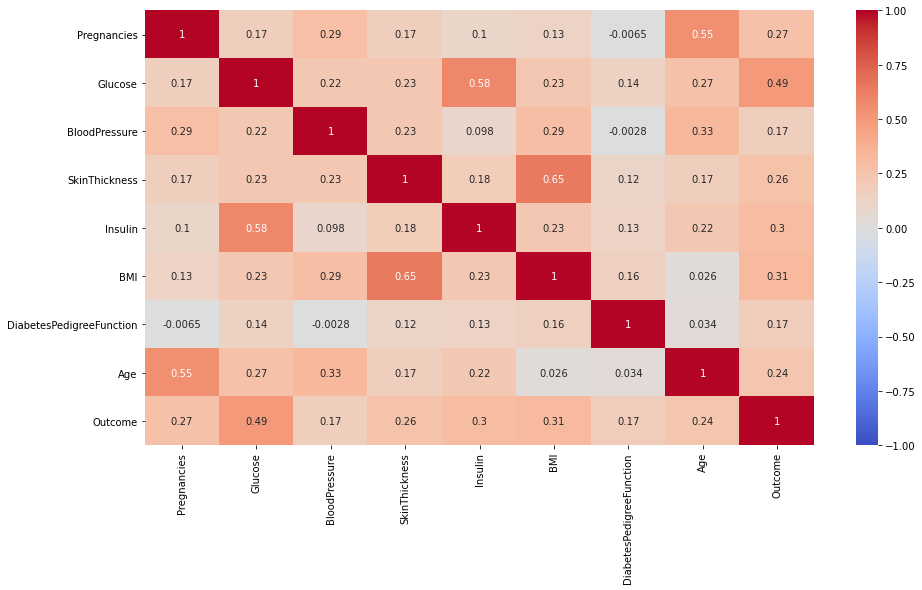

In [98]:
# 위에서 구한 상관계수를 heatmap 으로 시각화하기

plt.figure(figsize=(15, 8))
sns.heatmap(df_corr, annot=True, vmax=1, vmin=-1, cmap="coolwarm")

In [99]:
# Outcome 수치에 대한 상관계수만 모아서 보기

df_corr["Outcome"]

Pregnancies                 0.268218
Glucose                     0.494650
BloodPressure               0.170589
SkinThickness               0.259491
Insulin                     0.303454
BMI                         0.313680
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

## 상관계수가 높은 변수끼리 보기

<AxesSubplot:xlabel='Insulin', ylabel='Glucose'>

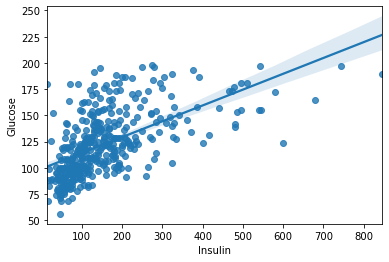

In [102]:
# 결측치 처리한 데이터 프레임으로 Insulin 과 Glucose 로 regplot 그리기

sns.regplot(data=df_matrix, x="Insulin", y="Glucose")

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

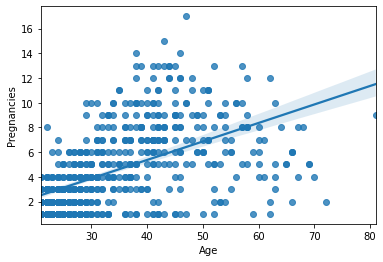

In [104]:
# Age 와 Pregnancies 로 regplot 그리기

sns.regplot(data=df_matrix, x="Age", y="Pregnancies")

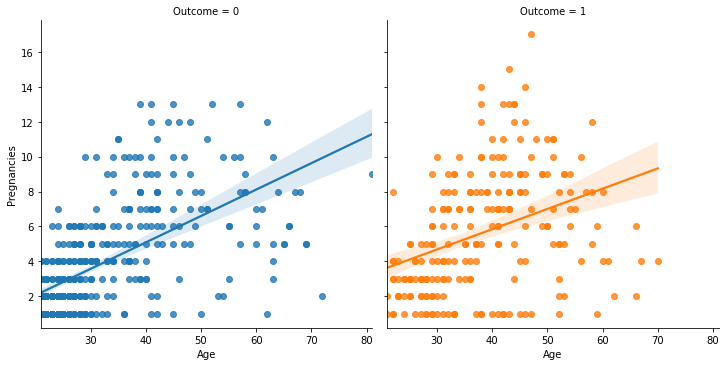

In [106]:
# Age 와 Pregnancies 로 lmplot 을 그리고 Outcome 에 따라 다른 색상으로 표현하기

sns.lmplot(data=df_matrix, x="Age", y="Pregnancies", hue="Outcome", col="Outcome")